In [1]:
import pandas as pd

flowers=pd.read_csv("data.csv")

flowers.head()

C:\Users\anand\AppData\Local\Temp\ipykernel_25916\1421868926.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,sepal length,sepal width,petal length,petal width,"class(0,1,2)"
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
X = flowers.iloc[:, :-1].values
Y = flowers.iloc[:, -1:].values

print("Matrix X shape:", X.shape)
print("Matrix Y shape:", Y.shape)

Matrix X shape: (150, 4)
Matrix Y shape: (150, 1)


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

np.set_printoptions(precision=2)


In [4]:
print ('The first element of X is: ', X[0])

The first element of X is:  [5.1 3.5 1.4 0.2]


In [5]:
print ('The first element of y is: ', Y[0,0])
print ('The last element of y is: ', Y[-1,0])

The first element of y is:  0
The last element of y is:  2


In [6]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(Y.shape))

The shape of X is: (150, 4)
The shape of y is: (150, 1)


In [7]:
X_min = np.min(X)
X_max = np.max(X)
X = (X - X_min) / (X_max - X_min)


In [8]:
X

array([[0.64, 0.44, 0.17, 0.01],
       [0.62, 0.37, 0.17, 0.01],
       [0.59, 0.4 , 0.15, 0.01],
       [0.58, 0.38, 0.18, 0.01],
       [0.63, 0.45, 0.17, 0.01],
       [0.68, 0.49, 0.21, 0.04],
       [0.58, 0.42, 0.17, 0.03],
       [0.63, 0.42, 0.18, 0.01],
       [0.55, 0.36, 0.17, 0.01],
       [0.62, 0.38, 0.18, 0.  ],
       [0.68, 0.46, 0.18, 0.01],
       [0.6 , 0.42, 0.19, 0.01],
       [0.6 , 0.37, 0.17, 0.  ],
       [0.54, 0.37, 0.13, 0.  ],
       [0.73, 0.5 , 0.14, 0.01],
       [0.72, 0.55, 0.18, 0.04],
       [0.68, 0.49, 0.15, 0.04],
       [0.64, 0.44, 0.17, 0.03],
       [0.72, 0.47, 0.21, 0.03],
       [0.64, 0.47, 0.18, 0.03],
       [0.68, 0.42, 0.21, 0.01],
       [0.64, 0.46, 0.18, 0.04],
       [0.58, 0.45, 0.12, 0.01],
       [0.64, 0.41, 0.21, 0.05],
       [0.6 , 0.42, 0.23, 0.01],
       [0.63, 0.37, 0.19, 0.01],
       [0.63, 0.42, 0.19, 0.04],
       [0.65, 0.44, 0.18, 0.01],
       [0.65, 0.42, 0.17, 0.01],
       [0.59, 0.4 , 0.19, 0.01],
       [0.

In [9]:

tf.random.set_seed(1234) 
model = Sequential([
    tf.keras.layers.InputLayer((4,)),
    tf.keras.layers.Dense(16, activation="relu", name="L1"),
    tf.keras.layers.Dense(8, activation="relu", name="L2"),
    tf.keras.layers.Dense(3, activation="softmax", name="Output"),
], name="my_model")


In [10]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [11]:
[layer1, layer2, layer3] = model.layers

In [12]:

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (4, 16), b1 shape = (16,)
W2 shape = (16, 8), b2 shape = (8,)
W3 shape = (8, 3), b3 shape = (3,)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.1904 - loss: 1.1380 - val_accuracy: 0.0000e+00 - val_loss: 1.1179
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6173 - loss: 1.0784 - val_accuracy: 0.0000e+00 - val_loss: 1.2390
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8229 - loss: 1.0506 - val_accuracy: 0.0000e+00 - val_loss: 1.2904
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8229 - loss: 1.0286 - val_accuracy: 0.0000e+00 - val_loss: 1.3575
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8229 - loss: 1.0020 - val_accuracy: 0.0000e+00 - val_loss: 1.4396
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8229 - loss: 0.9699 - val_accuracy: 0.0000e+00 - val_loss: 1.5104
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8229 - loss: 0.9291 - val_accuracy: 0.0000e+00 - val_loss: 1.5462
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8229 - loss: 0.8729 - val_accuracy

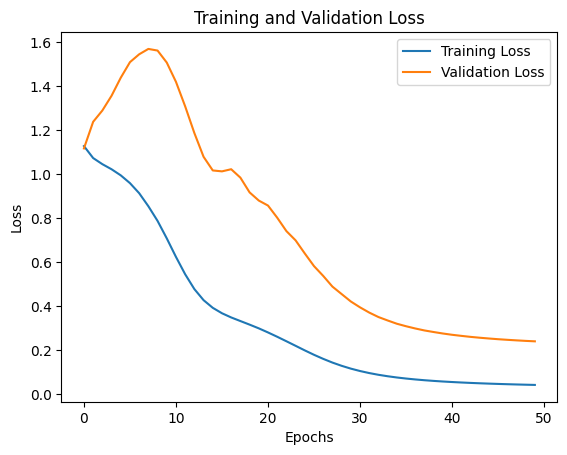

Final Training Accuracy: 0.9916666746139526
Final Validation Accuracy: 0.8666666746139526


In [13]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

import matplotlib.pyplot as plt

history = model.fit(
    X, Y,
    epochs=50,
    validation_split=0.2  # Splitting data into training and validation sets
)

# Extracting training and validation loss from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plotting training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]

print("Final Training Accuracy:", final_training_accuracy)
print("Final Validation Accuracy:", final_validation_accuracy)

In [14]:
history

In [30]:
sample_setosa = X[76]

prediction = model.predict(sample_setosa.reshape(1, 4))  

print(f"Predicted probabilities: \n{prediction}")
predicted_class_index = np.argmax(prediction)
print(f"Largest predicted class index: {predicted_class_index}")

if predicted_class_index == 0:
    print("Predicted class: iris-setosa")
elif predicted_class_index == 1:
    print("Predicted class: iris-versicolor")
else:
    print("Predicted class: iris-virginica")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted probabilities: 
[[6.82e-04 9.67e-01 3.25e-02]]
Largest predicted class index: 1
Predicted class: iris-versicolor
